In [2]:
from os import path
import numpy as np
import pandas as pd
import urllib
import zipfile
import sys
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import rc
from sklearn import linear_model
%matplotlib inline

Je n'ai pas pushé les fichiers de données utilisés vur leur taille, le notebook ne s'exécutera donc probablement pas.

In [3]:
# Initialisation du template des figures du notebook :

sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [4]:
# Chargement des donnees :

df_R201601 = pd.read_csv('R201601.CSV', encoding = "ISO-8859-1", sep = ';')

/Users/cluclu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_R201601.head()

,cpam,l_cpam,dpt,l_dpt,region,l_region,l_serie,SERIE,prs_nat,l_prs_nat,...,l_exe_spe1,exe_stj1,l_exe_stj1,top_slm,l_top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,171,171-La Rochelle,17,17-Charente-maritime,54,54-POITOU CHARENTES,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
1,371,371-Tours,37,37-Indre-et-Loire,24,24-CENTRE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"6,60","22,00","0,00",1,"1,00"
2,595,595-Lille,59,5-Nord,31,31-NORD PAS DE CALAIS,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
3,597,597-Roubaix,59,5-Nord,31,31-NORD PAS DE CALAIS,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
4,624,624-Lens,62,62-Pas-de-Calais,31,31-NORD PAS DE CALAIS,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"-6,90","-23,00","0,00",-1,"-1,00"


In [6]:
df_N201797 = pd.read_csv('N201707.CSV', 
                         encoding = "ISO-8859-1", sep = ';')

/Users/cluclu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_N201797.head()

,l_serie,SERIE,prs_nat,l_prs_nat,rem_date,sns_date,asu_nat,l_asu_nat,cpl_cod,l_cpl_cod,...,l_exe_spe,exe_spe1,l_exe_spe1,exe_stj1,l_exe_stj1,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,C Omnipraticiens,111111,1104,CONSULTATION OBLIGATOIRE ENFANT,201705,201705,3,Maternité,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"2.145,00","2.145,00","1,00",55.0,"55,00"
1,C Omnipraticiens,111111,1104,CONSULTATION OBLIGATOIRE ENFANT,201705,201705,3,Maternité,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,2,Salarié,"1.443,00","1.443,00","0,00",37.0,"37,00"
2,C Omnipraticiens,111111,1104,CONSULTATION OBLIGATOIRE ENFANT,201706,201705,3,Maternité,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"507,00","507,00","0,00",14.0,"14,00"
3,C Omnipraticiens,111111,1104,CONSULTATION OBLIGATOIRE ENFANT,201706,201705,3,Maternité,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,2,Salarié,"819,00","819,00","0,00",21.0,"21,00"
4,C Omnipraticiens,111111,1104,CONSULTATION OBLIGATOIRE ENFANT,201706,201706,3,Maternité,0,Sans majoration,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"3.260,30","3.260,30","43,00",85.0,"85,00"


In [8]:
df_N201797 = df_N201797.dropna()

In [9]:
# On récupère le fichier détaillé pour Décembre 2016:

df_R201612 = pd.read_csv('R201612.CSV', 
                         encoding = "ISO-8859-1", sep = ';')

/Users/cluclu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_R201612.head()

,cpam,l_cpam,dpt,l_dpt,region,l_region,l_serie,SERIE,prs_nat,l_prs_nat,...,l_exe_spe1,exe_stj1,l_exe_stj1,top_slm,l_top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,311,311-Toulouse,31,31-Haute-Garonne,73,73-MIDI PYRENEES,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
1,371,371-Tours,37,37-Indre-et-Loire,24,24-CENTRE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
2,751,751-Paris,75,75-Paris,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"13,80","46,00","94,00",2,"2,00"
3,941,941-Créteil,94,94-Val-de-Marne,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
4,971,971-Point-à-Pitre,971,971-Guadeloupe,1,01-GUADELOUPE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"15,14","50,47","0,00",2,"2,00"


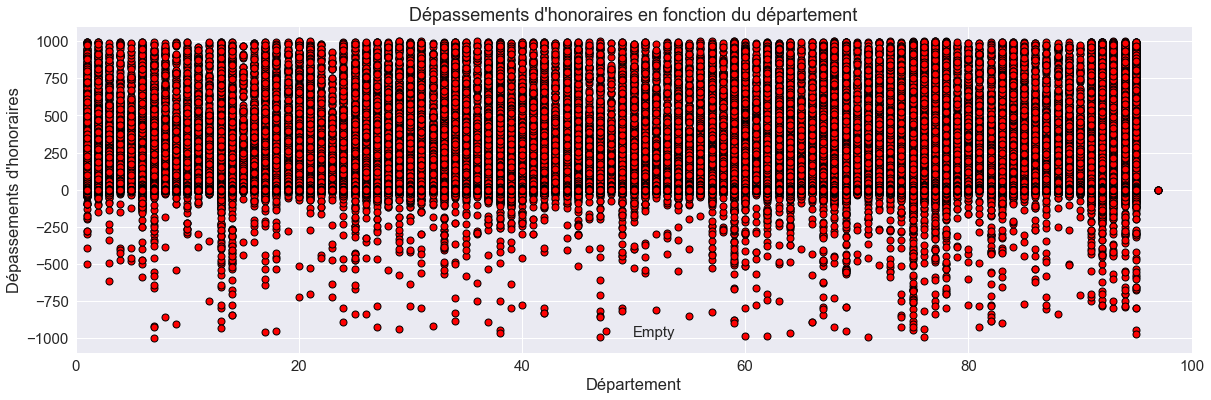

In [11]:
# On remplace les départements de la Corse par '20' pour pouvoir plotter:

df_R201612 = df_R201612.dropna()
df_R201612.dpt.replace(to_replace=['2B', '2A'], value=[20, 20], inplace=True)

y = df_R201612.loc[::,'dep_mon'].str.split('.').str[0]
y = y.str.split(',').str[0]
x = df_R201612.loc[::,'dpt']
x = x.astype(float)
y = y.astype(float)


fig = plt.figure(figsize=(20, 6))

plt.plot(x, y, 'o', label="Empty",
         markeredgecolor='k', markeredgewidth=1, color='red')
plt.xlim(0, 100)
plt.xlabel('Département')
plt.ylabel('Dépassements d\'honoraires')
plt.title('Dépassements d\'honoraires en fonction du département')
plt.legend()

In [12]:
df_R201612.head()

,cpam,l_cpam,dpt,l_dpt,region,l_region,l_serie,SERIE,prs_nat,l_prs_nat,...,l_exe_spe1,exe_stj1,l_exe_stj1,top_slm,l_top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,311,311-Toulouse,31,31-Haute-Garonne,73,73-MIDI PYRENEES,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
1,371,371-Tours,37,37-Indre-et-Loire,24,24-CENTRE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
2,751,751-Paris,75,75-Paris,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"13,80","46,00","94,00",2,"2,00"
3,941,941-Créteil,94,94-Val-de-Marne,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"6,90","23,00","0,00",1,"1,00"
4,971,971-Point-à-Pitre,971,971-Guadeloupe,1,01-GUADELOUPE,C Omnipraticiens,111111,1111,CONSULTATION COTEE C,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"15,14","50,47","0,00",2,"2,00"


In [13]:
df_dep = df_R201612[['dpt', 'dep_mon']]

df_R201612['dep_mon'] = df_R201612['dep_mon'].str.split('.').str[0]
df_R201612['dep_mon'] = df_R201612['dep_mon'].str.split(',').str[0]
df_R201612['dpt'] = df_R201612['dpt'].astype(float)
df_R201612['dep_mon'] = df_R201612['dep_mon'].astype(float)

df_dep.head()

,dpt,dep_mon
0,31,"0,00"
1,37,"0,00"
2,75,"94,00"
3,94,"0,00"
4,971,"0,00"


In [14]:
dpt_depassement = pd.DataFrame()
dpt_depassement['dpt'] = x
dpt_depassement['dep_mon'] = y
dpt_depassement.head()

,dpt,dep_mon
0,31.0,0.0
1,37.0,0.0
2,75.0,94.0
3,94.0,0.0
4,971.0,0.0


In [15]:
dpt_dep_moyenne = pd.DataFrame()
dpt_dep_moyenne = dpt_depassement.groupby(['dpt']).mean()
dpt_dep_moyenne = dpt_dep_moyenne.drop(97)

In [16]:
dpt_dep_moyenne.head()

,dep_mon
dpt,
1.0,12.217082
2.0,7.515093
3.0,7.291106
4.0,7.249169
5.0,6.495400


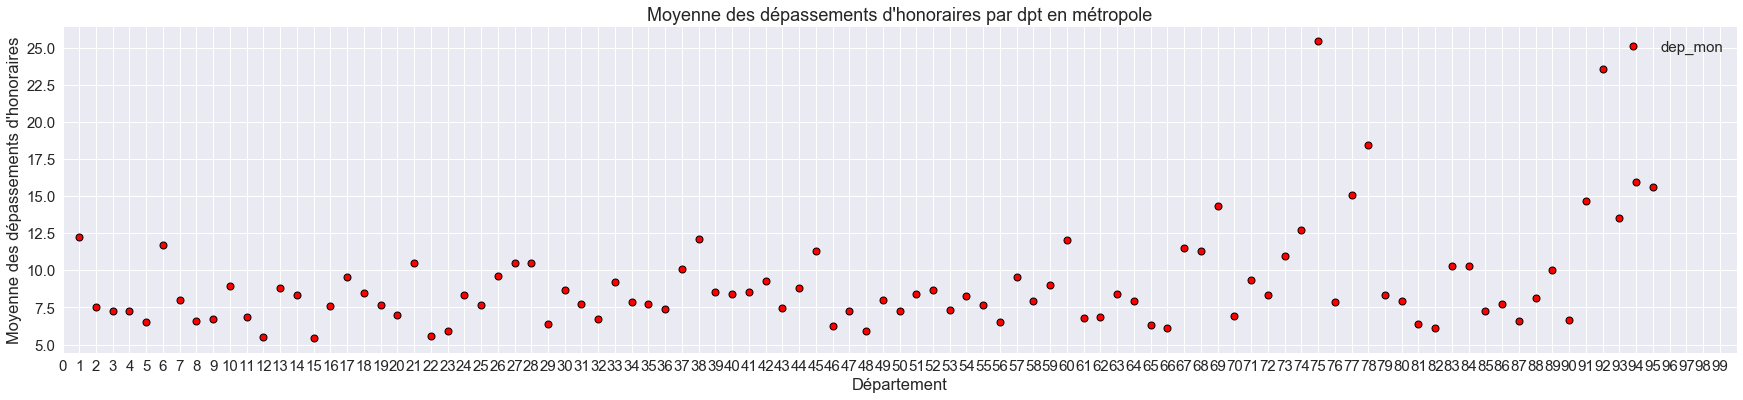

In [17]:
y= dpt_dep_moyenne.loc[::,'dep_mon']
x= dpt_dep_moyenne.index.values
fig = plt.figure(figsize=(30, 6))

plt.plot(x, y, 'o',
         markeredgecolor='k', markeredgewidth=1, color='red')
xtick = [i for i in range(0, 100)]
plt.xticks(xtick)
plt.xlim(0, 100)
plt.xlabel('Département')
plt.ylabel('Moyenne des dépassements d\'honoraires')
plt.title('Moyenne des dépassements d\'honoraires par dpt en métropole')
plt.legend()

In [18]:
dpt_dep_moyenne['dep_mon'].max(), dpt_dep_moyenne.idxmax()

(25.435306655299197, dep_mon    75.0
 dtype: float64)

In [19]:
dpt_dep_moyenne['dep_mon'].min(), dpt_dep_moyenne.idxmin()

(5.4473636197774127, dep_mon    15.0
 dtype: float64)

Pour le mois de Décembre 2016, les dépassements d'honoraires sont les plus forts en Ile de France, avec 25 euros en moyenne.
Ils sont minimums dans le Cantal, avec 5 euros en moyenne.